$\color{red}{\textbf{IMPORTANT}}$ If you don't have all the necessary libraries installed, run the following cell:

In [ ]:
!pip install numpy matplotlib scipy pandas uncertainties IPython

$\color{red}{\textbf{IMPORTANT}}$ If you don't have all the necessary input files locally, you can download them from GitHub: https://github.com/vojtechpleskot/physicslab4/tree/main/A8/example_data 

If you are running this notebook on Google Colab or similar environment, you can download the files by running the following cell:

In [34]:
# Download example data
# create a folder called example_data if it does not exist, yet
!mkdir -p example_data
!wget -P example_data https://github.com/vojtechpleskot/physicslab4/tree/main/A8/example_data/instructions.txt
!wget -P example_data https://github.com/vojtechpleskot/physicslab4/tree/main/A8/example_data/plato.txt
!wget -P example_data https://github.com/vojtechpleskot/physicslab4/tree/main/A8/example_data/absorption.txt
!wget -P example_data https://github.com/vojtechpleskot/physicslab4/tree/main/A8/example_data/poisson.txt

--2025-09-09 16:47:35--  https://github.com/vojtechpleskot/physicslab4/tree/main/A8/example_data/instructions.txt
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/vojtechpleskot/physicslab4/blob/main/A8/example_data/instructions.txt [following]
--2025-09-09 16:47:35--  https://github.com/vojtechpleskot/physicslab4/blob/main/A8/example_data/instructions.txt
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘example_data/instructions.txt.3’

instructions.txt.3      [ <=>                ] 184.15K  --.-KB/s    in 0.08s   

2025-09-09 16:47:36 (2.19 MB/s) - ‘example_data/instructions.txt.3’ saved [188569]

--2025-09-09 16:47:36--  https://github.com/vojtechpleskot/physicslab4/tree/main/A8/example_data/plato.txt
Resolving github.com (github.com)..

# Beta radiation absorption

# Geiger-Mueller counter

The Geiger-Mueller (GM) counter is a type of gas detector. It is typically cylindrical, where the cylinder shell forms the cathode, a thin anode wire is stretched across the axis of the cylinder, and the space between the two is filled with a suitable gas mixture (usually a noble gas with a so-called quench admixture). When the GM-detector is exposed to beta-radiation, this radiation ionizes the gas atoms. The released electrons move towards the anode due to the electric field, the cations move much more slowly towards the cathode. At sufficient voltage, the electrical intensity around the thin anode is so large that the electrons accelerated towards it ionize and excite other atoms, resulting in the development of an electrical discharge. This is stopped by a decrease in electrical intensity due to the presence of a space charge consisting of slow cations. The quenching pressure in the gas then prevents the discharge from restarting when the electrical intensity rises again to a sufficient level. The amount of charge transferred and therefore the magnitude of the signal recorded (typically a voltage pulse on the working resistor) is always the same at constant voltage regardless of the energy of the original ionizing particle (but increases steeply with increasing voltage). An important characteristic of the GM-detector is the dependence of the signal count rate on the applied voltage. It appears that after a certain applied voltage is exceeded, there is a sharp increase in the count rate, which is due to the electronics setup that only records pulses whose amplitude exceeds a certain threshold. This surge is followed by an almost constant section, typically referred to as a plateau. If we increase the voltage further, spontaneous discharges start to occur and the count rate starts to increase again rapidly, which has a negative effect on the lifetime of the GM-detector gas cartridge. Therefore, never exceed 800 V with the currently used GM-detector. The operating voltage is usually chosen around the middle of the plateau.

$\color{red}{\textbf{Task:}}$ Measure the characteristics of the GM-detector.

- Use an absorber with an area density of approximately 100 $\mathrm{mg}\,\mathrm{cm}^{-2}$ (i.e. one thicker plate).
- Measure the number of signal events in the interval 400 V - 800 V in steps of 5 V with a measurement time of 20 s.

In [35]:
# Insert your data here. Store it in a pandas DataFrame with two columns: 'U' (for the applied voltage) and 'N' (for the number of events).

# For testing: read the table of blank-space-separated values in file example_data/plato.txt to a pandas DataFrame. Start reading on the seventh line of the file. Read just the first and the fifth columns.

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('example_data/plato.txt', sep='\s+', skiprows=6, usecols=[0, 4], header=None)
df.columns = ['U', 'N']

<>:8: SyntaxWarning: invalid escape sequence '\s'
<>:8: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_220633/1474470386.py:8: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv('example_data/plato.txt', sep='\s+', skiprows=6, usecols=[0, 4], header=None)


$\color{red}{\textbf{Task:}}$ Plot the dependence of the number of signals on the voltage applied to the GM-detector. In the graph, you can also indicate where the plateau of the characteristic is located and what is the appropriate operating voltage.

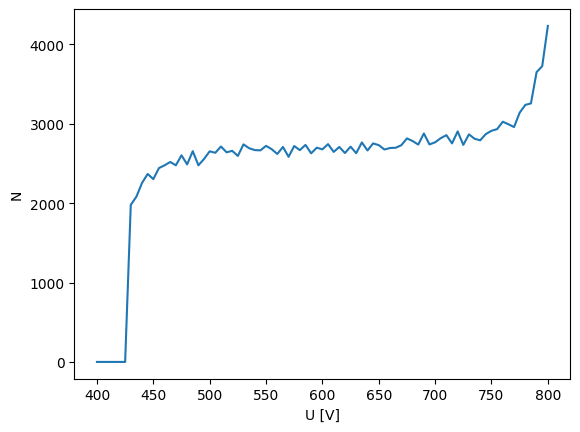

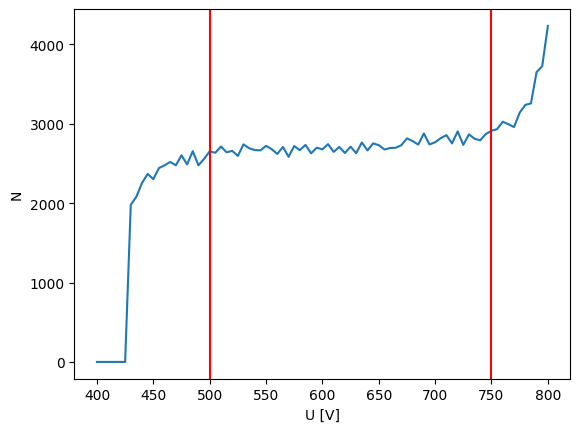

In [36]:
# Insert your code here.

# Plot the data in the DataFrame. Use the first column as the x-axis and the second column as the y-axis.
def plot_data(df):
    plt.plot(df['U'], df['N'])
    plt.xlabel('U [V]')
    plt.ylabel('N')
    return

plot_data(df)
plt.show()

# Identify the plateau region of the data. Display the plateau region with two vertical lines in the plot.
# The plateau region is the region where the counts are approximately constant. In the plot, the plateau region should be displayed with two vertical red lines.
# The region is to be identified manually by looking at the plot.
plot_data(df)
plt.axvline(x=500, color='r')
plt.axvline(x=750, color='r')
plt.show()

# Beta radiation and its absorption

Beta radiation is made up of electrons emitted in the beta-decays of atomic nuclei:
$$
^{A}_{Z}\mathrm{X} \rightarrow ^{A}_{Z+1}\mathrm{Y} + e^- + \bar{\nu}_e,
$$
where X and Y denote the parent and daughter nuclei, $e^-$ and $\bar{\nu}_e$ the electron and its antineutrino. Since this is a three-particle decay, the kinetic energy of these particles depends not only on their masses but also on the angles at which they fly out from each other. The energy of the emitted electrons thus forms a continuous spectrum from zero to a certain maximum value, which typically ranges from tens of keV to units of MeV depending on the decaying isotope X (parent nucleus). Electrons emitted in beta-decay interact mainly by excitation or ionization of the atomic envelope or by elastic collisions with atomic nuclei. This gradually slows them down and changes the direction of their flight, so that some of them no longer reach the detector - this loss is called absorption. The absorption curve is then defined as the dependence of the number of electrons passing through the absorber on the thickness of the absorber. The shape of this curve for monoenergetic electrons is not exponential, unlike to photons, but if we then take into account the fact that the beta-decay electrons have a continuous spectrum, not monoenergetic, we obtain an absorption curve whose shape can be approximated by an exponential function (this is a non-trivial fact that we will not discuss here):
$$
N(d) = N(0) e^{-\mu(E_0) d},
$$
where $N(d)$ denotes the number of electrons passing through an absorber of area density $d$. The quantity $\mu$ represents the absorption coefficient, the value of which depends on the maximum observed beta-decay energy $E_0$ and the absorber material. The emitter used, $^{90}\mathrm{Sr}$, decays in a cascade of two successive beta-decays:
$$
^{90}_{38}\mathrm{Sr} \rightarrow ^{90}_{39}\mathrm{Y} \rightarrow ^{90}_{40}\mathrm{Zr},
$$
where the maximum energies of the electrons emitted in each step of the cascade $E_{0}^{1}$, $E_{0}^{2}$ are different. The corresponding absorption curve is thus given by the sum of two exponential functions:
$$
N(d) = N^{1}(0) e^{-\mu(E_{0}^{1}) d} + N^{2}(0) e^{-\mu(E_{0}^{2}) d} + N_\mathrm{B},
$$
where we have also added a constant term $N_B$, which corresponds to background signals whose frequency does not depend or only weakly depends on the thickness of the absorber. 

$\color{red}{\textbf{Task:}}$ Measure the absorption curve of beta radiation emitted by $^{90}\mathrm{Sr}$ using a GM-detector. 

- The measurement is performed with a GM-detector at a voltage in the plateau region.
- The measurement time is set to 100 s for each absorber thickness.
- The aluminium plates are added between the source and the detector gradually from the thinnest to the thickest. In this way, an interval of areal densities from 0 to about $1100\ \mathrm{mg}\,\mathrm{cm}^{-2}$ is covered.
  - After all the aluminium plates have been added, one more measurement with the lead plate is done.

In [37]:
# Insert your measured data into a DataFrame whose columns are named 'd' (for the absorber thickness), 'N' (for the number of events), and 'N_unc' (for the uncertainty on N).
# Convert d to g / cm^2.
# Add a column 'N_unc' to the DataFrame that contains the uncertainty on N.

# For testing: the example data from the file example_data/absorption.txt are read.

df = pd.read_csv('example_data/absorption.txt', sep='\s+', skiprows=1, usecols=[1, 2], header=None)
# remove the last row
df = df[:-1]
# name the columns
df.columns = ['d', 'N']
# cast the columns to float
df['d'] = df['d'].astype(float) / 1000.
df['N'] = df['N'].astype(float)
# calculate the uncertainty on N
df['N_unc'] = df['N']**0.5
print(df.rename(columns={'d': 'd [g/cm^2]', 'N': 'N', 'N_unc': 'N_unc'}))

    d [g/cm^2]        N       N_unc
0       0.0000  13556.0  116.430237
1       0.0097  10336.0  101.666120
2       0.0195   8466.0   92.010869
3       0.0293   6906.0   83.102347
4       0.0390   6176.0   78.587531
5       0.0487   5256.0   72.498276
6       0.0586   4865.0   69.749552
7       0.0689   4264.0   65.299311
8       0.0791   3872.0   62.225397
9       0.0896   3562.0   59.682493
10      0.1002   3257.0   57.070132
11      0.1112   3071.0   55.416604
12      0.1225   2812.0   53.028294
13      0.1410   2321.0   48.176758
14      0.2810   1037.0   32.202484
15      0.4150    496.0   22.271057
16      0.5520    240.0   15.491933
17      0.6931    159.0   12.609520
18      0.8301    117.0   10.816654
19      0.9616    119.0   10.908712
20      1.0954    101.0   10.049876


<>:7: SyntaxWarning: invalid escape sequence '\s'
<>:7: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_220633/3334138175.py:7: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv('example_data/absorption.txt', sep='\s+', skiprows=1, usecols=[1, 2], header=None)


$\color{red}{\textbf{Task:}}$ Plot the measured points and fit them to get the absorption curve.

In [38]:
import matplotlib.pyplot as plt
import matplotlib as mpl

def plot(x, y, y_err, x_fit, y_fit, y_fit_lower, y_fit_upper, xlabel, ylabel):

    # draw x, y with error bars
    plt.errorbar(x, y, y_err, fmt='o', label='Data', color='black')

    # draw the fit function and its uncertainty band
    plt.fill_between(x_fit, y_fit_lower, y_fit_upper, color='red', alpha=0.3)

    # create a legend entry for the fit function and its uncertainty band
    line_with_band = mpl.lines.Line2D([], [], color='red', label='Fit', linestyle='-', linewidth=2)
    band = mpl.patches.Patch(color='red', alpha=0.3, label='Fit uncertainty')

    # get the current legend handles and labels
    handles, labels = plt.gca().get_legend_handles_labels()
    plt.legend(handles=handles + [(line_with_band, band)], labels=labels + ['Fit'])

    # finally, plot
    plt.plot(x_fit, y_fit, 'r-')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

    return

<>:25: SyntaxWarning: invalid escape sequence '\m'
<>:28: SyntaxWarning: invalid escape sequence '\m'
<>:28: SyntaxWarning: invalid escape sequence '\m'
<>:28: SyntaxWarning: invalid escape sequence '\ '
<>:29: SyntaxWarning: invalid escape sequence '\m'
<>:29: SyntaxWarning: invalid escape sequence '\m'
<>:29: SyntaxWarning: invalid escape sequence '\ '
<>:30: SyntaxWarning: invalid escape sequence '\m'
<>:25: SyntaxWarning: invalid escape sequence '\m'
<>:28: SyntaxWarning: invalid escape sequence '\m'
<>:28: SyntaxWarning: invalid escape sequence '\m'
<>:28: SyntaxWarning: invalid escape sequence '\ '
<>:29: SyntaxWarning: invalid escape sequence '\m'
<>:29: SyntaxWarning: invalid escape sequence '\m'
<>:29: SyntaxWarning: invalid escape sequence '\ '
<>:30: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_220633/2010990751.py:25: SyntaxWarning: invalid escape sequence '\m'
  plot(df['d'], df['N'], df['N_unc'], x, y_fit, y_fit - sigma_fit, y_fit + sigma_fit, '$d$ [g $\math

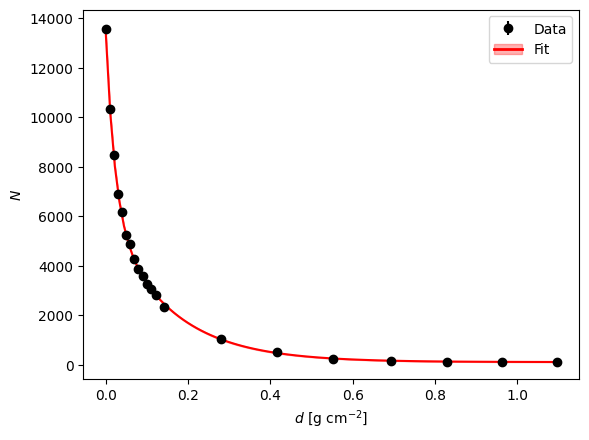

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [39]:
# Insert your code here.

from IPython.display import display, Latex
import uncertainties
from uncertainties import unumpy
import numpy as np
from scipy.optimize import curve_fit

# Define the absorption function
def absorption_curve(d, N_1, mu_E1, N_2, mu_E2, N_B):
    return N_1 * np.exp(-mu_E1 * d) + N_2 * np.exp(-mu_E2 * d) + N_B

# fit the resolution function to the data
nom, cov = curve_fit(absorption_curve, df['d'], df['N'], sigma=df['N_unc'], absolute_sigma=True)

# to draw the fit function and its uncertainty band, we need to evaluate the fit function at many points
x = np.linspace(df['d'].min(), df['d'].max(), 100)
N_1, mu_E1, N_2, mu_E2, N_B = uncertainties.correlated_values(nom, cov)
wrapped_absorption = uncertainties.wrap(absorption_curve)
y_fit_list = [wrapped_absorption(x, N_1, mu_E1, N_2, mu_E2, N_B) for x in x]
y_fit     = np.array([y.nominal_value for y in y_fit_list])
sigma_fit = np.array([y.std_dev       for y in y_fit_list])

# plot the data and the fit function with its uncertainty band
plot(df['d'], df['N'], df['N_unc'], x, y_fit, y_fit - sigma_fit, y_fit + sigma_fit, '$d$ [g $\mathrm{cm}^{-2}$]', '$N$')

# print the fit parameters
display(Latex(f'$\mu_{{E^1_0}} = {mu_E1}~\mathrm{{g}}^{{-1}}\ \mathrm{{cm}}^2$'))
display(Latex(f'$\mu_{{E^2_0}} = {mu_E2}~\mathrm{{g}}^{{-1}}\ \mathrm{{cm}}^2$'))
display(Latex(f'$N_\mathrm{{B}} = {N_B}$'))

$\color{red}{\textbf{Task:}}$ Compare how the fitted parameter $N_\mathrm{B}$ (dis)agrees with the value measured with the thick absorber, and discuss why.

$\color{red}{\textbf{Solution:}}$ 

$\color{red}{\textbf{Task:}}$ Calculate the maximum energy of the electrons emitted in the beta-decay of $^{90}\mathrm{Sr}$. An empirical relation between $\mu$ and $E_0$ exists for the aluminium used here:
$$
\mu[g^{-1} \mathrm{cm}^2] = 17(E_0[\mathrm{MeV}])^{-1.43},
$$
to which one must substitute in the indicated units.

In [40]:
# Insert your code here.

# calculate E_0 and its uncertainty for the two decays
E_1 = (17 / mu_E1) ** (1 / 1.43)
E_2 = (17 / mu_E2) ** (1 / 1.43)
display(Latex(f'$E_{{0}}^{{1}} = {E_1}\ \mathrm{{MeV}}$'))
display(Latex(f'$E_{{0}}^{{2}} = {E_2}\ \mathrm{{MeV}}$'))


<>:6: SyntaxWarning: invalid escape sequence '\ '
<>:7: SyntaxWarning: invalid escape sequence '\ '
<>:6: SyntaxWarning: invalid escape sequence '\ '
<>:7: SyntaxWarning: invalid escape sequence '\ '
/tmp/ipykernel_220633/4188216917.py:6: SyntaxWarning: invalid escape sequence '\ '
  display(Latex(f'$E_{{0}}^{{1}} = {E_1}\ \mathrm{{MeV}}$'))
/tmp/ipykernel_220633/4188216917.py:7: SyntaxWarning: invalid escape sequence '\ '
  display(Latex(f'$E_{{0}}^{{2}} = {E_2}\ \mathrm{{MeV}}$'))


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

# Electron range

The electron range for a given maximum energy, $R_\beta(E_0)$, can be roughly estimated as the thickness at which the number of electrons passing through the absorber is so low that it is statistically indistinguishable from the background. I.e. let's estimate it as the thickness at which the number of punch-through electrons is equal to the uncertainty on $N_\mathrm{B}$.

$\color{red}{\textbf{Task:}}$ Estimate $R_\beta$ for both maximum electron energies from the $^{90}\mathrm{Sr}$ decay chain.

In [41]:
# Insert your code here.

# Solve the equation N_1 * np.exp(-mu_E1 * R) = N_B.std_dev for R.

import uncertainties.umath

R_1 = -uncertainties.umath.log(N_B.std_dev / N_1) / mu_E1
R_2 = -uncertainties.umath.log(N_B.std_dev / N_2) / mu_E2
display(Latex(f'$R^1_{{\\beta}} = {R_1}\ \mathrm{{g}}\,\mathrm{{cm}}^{{-2}}$'))
display(Latex(f'$R^2_{{\\beta}} = {R_2}\ \mathrm{{g}}\,\mathrm{{cm}}^{{-2}}$'))


<>:9: SyntaxWarning: invalid escape sequence '\ '
<>:9: SyntaxWarning: invalid escape sequence '\,'
<>:10: SyntaxWarning: invalid escape sequence '\ '
<>:10: SyntaxWarning: invalid escape sequence '\,'
<>:9: SyntaxWarning: invalid escape sequence '\ '
<>:9: SyntaxWarning: invalid escape sequence '\,'
<>:10: SyntaxWarning: invalid escape sequence '\ '
<>:10: SyntaxWarning: invalid escape sequence '\,'
/tmp/ipykernel_220633/1273978841.py:9: SyntaxWarning: invalid escape sequence '\ '
  display(Latex(f'$R^1_{{\\beta}} = {R_1}\ \mathrm{{g}}\,\mathrm{{cm}}^{{-2}}$'))
/tmp/ipykernel_220633/1273978841.py:9: SyntaxWarning: invalid escape sequence '\,'
  display(Latex(f'$R^1_{{\\beta}} = {R_1}\ \mathrm{{g}}\,\mathrm{{cm}}^{{-2}}$'))
/tmp/ipykernel_220633/1273978841.py:10: SyntaxWarning: invalid escape sequence '\ '
  display(Latex(f'$R^2_{{\\beta}} = {R_2}\ \mathrm{{g}}\,\mathrm{{cm}}^{{-2}}$'))
/tmp/ipykernel_220633/1273978841.py:10: SyntaxWarning: invalid escape sequence '\,'
  display(Latex(

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

$\color{red}{\textbf{Task:}}$ Plot the two absorption curves and the estimated electron ranges.

<>:33: SyntaxWarning: invalid escape sequence '\m'
<>:33: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_220633/3536102389.py:33: SyntaxWarning: invalid escape sequence '\m'
  plt.xlabel('$d$ [g $\mathrm{cm}^{-2}$]')


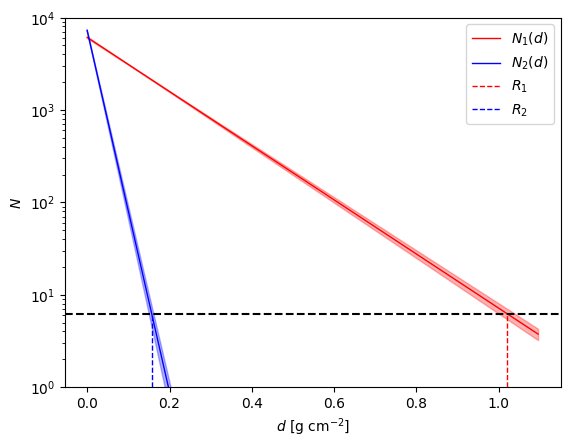

In [42]:
# Insert your code here.

# Plot the curves for the two decays in the same plot. Use the same x-axis range for both curves.
# Plot the above estimated values of R_1 and R_2 with vertical lines in the plot.
# The plot should have a logarithmic y-axis.

x = np.linspace(df['d'].min(), df['d'].max(), 100)

# the first absorption curve
y1 = [wrapped_absorption(x, N_1, mu_E1, 0, 0, 0) for x in x]
y1_upper = unumpy.nominal_values(y1) + unumpy.std_devs(y1)
y1_lower = unumpy.nominal_values(y1) - unumpy.std_devs(y1)
plt.plot(x, unumpy.nominal_values(y1), label='$N_{1}(d)$', linewidth=1, color='red')
plt.fill_between(x, y1_lower, y1_upper, color='red', alpha=0.3)

# the second absorption curve
y2 = [wrapped_absorption(x, 0, 0, N_2, mu_E2, 0) for x in x]
y2_upper = unumpy.nominal_values(y2) + unumpy.std_devs(y2)
y2_lower = unumpy.nominal_values(y2) - unumpy.std_devs(y2)
plt.plot(x, unumpy.nominal_values(y2), label='$N_{2}(d)$', linewidth=1, color='blue')
plt.fill_between(x, y2_lower, y2_upper, color='blue', alpha=0.3)

# vertical lines at R_1 and R_2
plt.vlines(x=R_1.nominal_value, ymin=1, ymax=N_B.std_dev, label='$R_1$', linestyle='--', linewidth=1, color='red')
plt.vlines(x=R_2.nominal_value, ymin=1, ymax=N_B.std_dev, label='$R_2$', linestyle='--', linewidth=1, color='blue')

# horizontal line at N_B.std_dev
plt.axhline(y=N_B.std_dev, color='black', linestyle='--')

# labels etc.
plt.yscale('log')
plt.ylim(1, 1e4)
plt.xlabel('$d$ [g $\mathrm{cm}^{-2}$]')
plt.ylabel('$N$')
plt.legend()
plt.show()

$\color{red}{\textbf{Task:}}$ The above method of estimating the electron range is quite rough. Discuss why it is so and suggest some alternative method.

$\color{red}{\textbf{Solution:}}$

$\color{red}{\textbf{Task:}}$ From the maximum electron range $R_{\beta}^{1,2}$ (in units of areal density), estimate the maximum electron energies $E_0^{1,2}$. Use the following empirical relations:
$$
R_{\beta}[\mathrm{g}\,\mathrm{cm}^{-2}] = \begin{cases}
0.407 \times (E_0[\mathrm{MeV}])^{1.38} & 0.15 \mathrm{MeV} < E_0 \leq 0.8 \mathrm{MeV} \\
0.542 \times (E_0[\mathrm{MeV}]) -0.133 & E_0 > 0.8 \mathrm{MeV},
\end{cases}
$$
to which it is necessary to substitute in the indicated units.

In [43]:
# Insert your code here.

# From R_1 and R_2, calculate the maximum electron energies E_0^1 and E_0^2 of the beta particles. Use the empirical formula just above.

E_1 = (R_1 / 0.407) ** (1 / 1.38)
E_2 = (R_2 + 0.133) / 0.542
display(Latex(f'$E_{{0}}^{{1}} = {E_1}\ \mathrm{{MeV}}$'))
display(Latex(f'$E_{{0}}^{{2}} = {E_2}\ \mathrm{{MeV}}$'))

<>:7: SyntaxWarning: invalid escape sequence '\ '
<>:8: SyntaxWarning: invalid escape sequence '\ '
<>:7: SyntaxWarning: invalid escape sequence '\ '
<>:8: SyntaxWarning: invalid escape sequence '\ '
/tmp/ipykernel_220633/1761028881.py:7: SyntaxWarning: invalid escape sequence '\ '
  display(Latex(f'$E_{{0}}^{{1}} = {E_1}\ \mathrm{{MeV}}$'))
/tmp/ipykernel_220633/1761028881.py:8: SyntaxWarning: invalid escape sequence '\ '
  display(Latex(f'$E_{{0}}^{{2}} = {E_2}\ \mathrm{{MeV}}$'))


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

$\color{red}{\textbf{Task:}}$ Compare the determined values of the maximum energies $E_0^1$, $E_0^2$ with the tabulated values [1].

$\color{red}{\textbf{Solution:}}$

# Poisson distribution

The detection of individual electrons emitted in beta decay within a specific time interval are mutually independent random events. The probability $P(k)$ that such an event occurs exactly $k$ times is given by the Poisson distribution:
$$
P(k) = \frac{\mu^k}{k!} e^{-\mu},
$$
where $\mu$ represents the mean value. The standard deviation of this distribution is $\sqrt{\mu}$. With an increasing $\mu$, the Poisson distribution converges to the Gaussian distribution:
$$
P(x) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x-\mu)^2}{2\sigma^2}},
$$
where $\sigma = \sqrt{\mu}$.

$\color{red}{\textbf{Task:}}$ Demonstrate that the number of emitted electrons is described by the Poisson distribution.

- Measurement is done without the absorber, 765 times, each time for 1 s.

In [44]:
# Insert your data here. The data should be inserted into a DataFrame with a single column named 'N'.

# For testing: load the example data.
df = pd.read_csv('example_data/poisson.txt', sep='\s+', skiprows=1, usecols=[2], header=None)
df.columns = ['N']

<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_220633/3071643432.py:4: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv('example_data/poisson.txt', sep='\s+', skiprows=1, usecols=[2], header=None)


$\color{red}{\textbf{Task:}}$ Fit the data with the Poisson distribution.
- Remember that the Poisson distribution mean, $\mu$, is estimated as the sample mean.
- The standard deviation of $\mu$ is then estimated as the square root of the sample variance divided by the square root of the number of measurements.

In [45]:

# Insert your code here.

# The mean value estimate
mu_fit = df['N'].mean()

# Calculate the standard deviation of the mean
mu_fit_unc = df['N'].std() / np.sqrt(len(df))

# Print the fit parameter
display(Latex(f'$\mu = {mu_fit:.2f} \pm {mu_fit_unc:.2f}$'))

<>:10: SyntaxWarning: invalid escape sequence '\m'
<>:10: SyntaxWarning: invalid escape sequence '\p'
<>:10: SyntaxWarning: invalid escape sequence '\m'
<>:10: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_220633/909973014.py:10: SyntaxWarning: invalid escape sequence '\m'
  display(Latex(f'$\mu = {mu_fit:.2f} \pm {mu_fit_unc:.2f}$'))
/tmp/ipykernel_220633/909973014.py:10: SyntaxWarning: invalid escape sequence '\p'
  display(Latex(f'$\mu = {mu_fit:.2f} \pm {mu_fit_unc:.2f}$'))


<IPython.core.display.Latex object>

$\color{red}{\textbf{Task:}}$ Check the goodness of fit using the chi-squared test - calculate the p-value and discuss whether the fit is acceptable.

In [46]:
# Insert your code here.

# Calculate the chi-squared value of the fit
residuals = df['N'] - mu_fit
chi_square = np.sum(residuals ** 2 / mu_fit)
ndf = len(df) - 1  # number of degrees of freedom
display(Latex(f'$\chi^2 = {chi_square:.2f}$'))
display(Latex(f'ndf $= {ndf}$'))

# Calculate the p-value.
import scipy
p_value = 1 - scipy.stats.chi2.cdf(chi_square, ndf)
display(Latex(f'$p = {p_value:.4f}$'))

<>:7: SyntaxWarning: invalid escape sequence '\c'
<>:7: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_220633/1759660307.py:7: SyntaxWarning: invalid escape sequence '\c'
  display(Latex(f'$\chi^2 = {chi_square:.2f}$'))


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

$\color{red}{\textbf{Task:}}$ Make a histogram of the outcome.
- The histogram should be normalized to the unit area (i.e. each bin should be divided by the total number of measurements).

In [47]:
# Insert your code here.

# histogram the data
hist, bin_edges = np.histogram(df['N'], bins=[df['N'].min() - 0.5 + i for i in range(df['N'].max() - df['N'].min() + 1)], density=True)

$\color{red}{\textbf{Task:}}$ Plot the histogram and the fitted Poisson distribution.

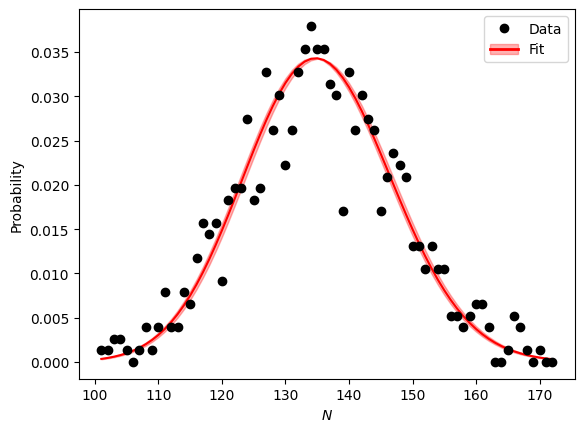

In [48]:

# Insert your code here.

# to draw the fit function and its uncertainty band, we need to evaluate the fit function at many points
x = np.arange(df['N'].min(), df['N'].max())
from scipy.stats import poisson
y_fit = poisson.pmf(x, mu_fit)

# calculate the bin centers
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2


y_fit_upper = poisson.pmf(x, mu_fit + mu_fit_unc)
y_fit_lower = poisson.pmf(x, mu_fit - mu_fit_unc)

# plot the data and the fit function
plot(bin_centers, hist, None, x, y_fit, y_fit_lower, y_fit_upper, '$N$', 'Probability')

# Literature

[1] S. K. Basu and E. A. McCutchan, Nuclear Data Sheets for A = 90, Nucl. Data Sheets 165 (2020) 1-329, available at https://www.nndc.bnl.gov/ensdf/